# Bike Sharing Demand Prediction
This notebook aims to analyze and predict the demand for shared bikes based on various factors. The objective is to help BoomBikes optimize their business strategy post-pandemic.

## 1. Importing Libraries
We start by importing necessary libraries for data manipulation, visualization, and modeling.

In [3]:
# Load the dataset into a pandas DataFrame
# Assumption: The CSV file is formatted correctly with expected column names.
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
bike_df = pd.read_csv("day.csv")

# Displaying first few rows to understand data structure
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Suppress warning
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset
We load the dataset to understand the structure and features available for analysis.

In [6]:
# Load the dataset into a pandas DataFrame
# Assumption: The CSV file is formatted correctly with expected column names.
bike_df = pd.DataFrame(pd.read_csv("day.csv"))

In [7]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
print(bike_df.shape)

(730, 16)


In [11]:
# Calculate percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# Calculate row-wise null count percentage
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [13]:
# Checking for duplicates and dropping the entire duplicate row if any

bike_dup = bike_df.copy()

bike_dup.drop_duplicates(subset=None, inplace=True)

In [14]:
bike_dup.shape

(730, 16)

In [15]:
bike_df.shape

(730, 16)

In [ ]:
#No duplicates present in the dataset

In [16]:
#Create a copy of the  dataframe, without the 'instant' column, as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike_df.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

In [17]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
#Create dataset with only numerical variables

bike_new=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [20]:
# Convert season, weather condition, month and weekday - numerical variable to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [21]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [22]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [23]:
bike_new.shape

(730, 30)

In [24]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [25]:
# Split the dataset into training and testing sets
# Assumption: The dataset is sufficiently large to split without data leakage.
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 42)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [27]:
df_train.shape

(510, 30)

In [28]:
df_test.info

<bound method DataFrame.info of      yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
468   1        0           0  20.295000  24.39980  50.2917  12.791439  7460   
148   0        0           0  27.367500  30.77750  81.8750  14.333846  4788   
302   0        0           0  13.085847  16.06645  62.3750  11.833339  3331   
355   0        0           1  17.356653  21.30605  75.7500   3.167425  3068   
515   1        0           1  27.880000  31.56645  49.2917  13.083693  7338   
..   ..      ...         ...        ...       ...      ...        ...   ...   
332   0        0           1  18.791653  22.56875  83.0833  17.292164  2914   
532   1        0           0  24.292500  28.59875  59.8750   9.708568  6978   
558   1        0           1  29.998347  33.39665  48.5833   5.416950  7499   
137   0        0           1  22.550000  26.35790  87.0000  13.499964  3855   
314   0        1           0  13.290847  15.34085  44.6250  21.083225  3368   

     season_2  seas

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [30]:
#Checking the column header of training data
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

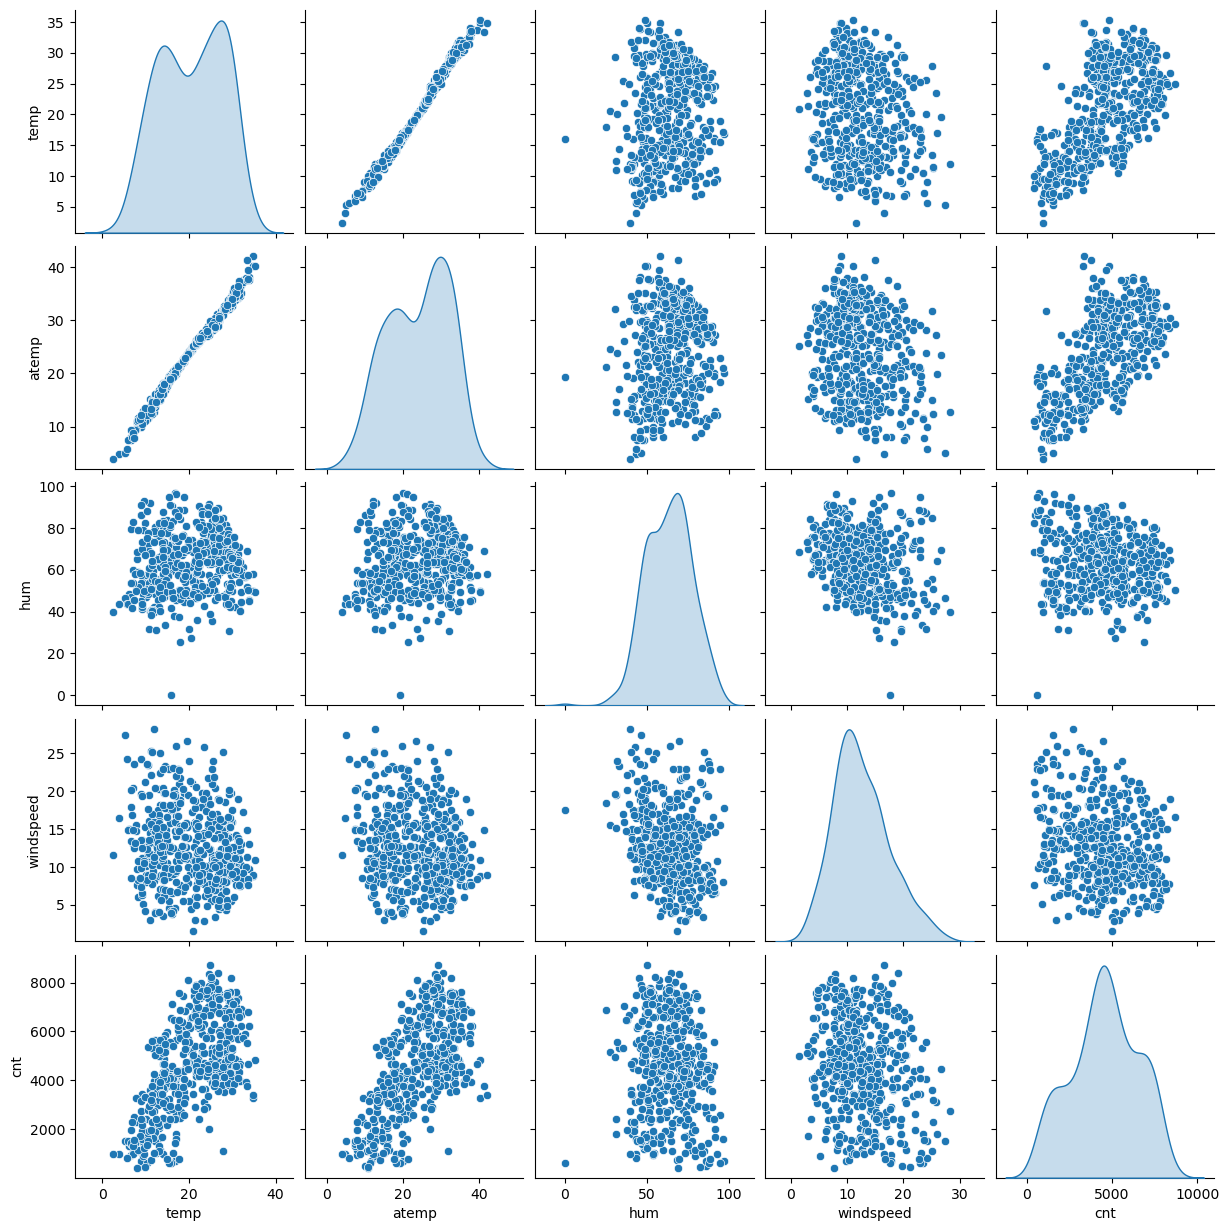

In [31]:
# Perform exploratory data analysis (EDA) to visualize relationships between features
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

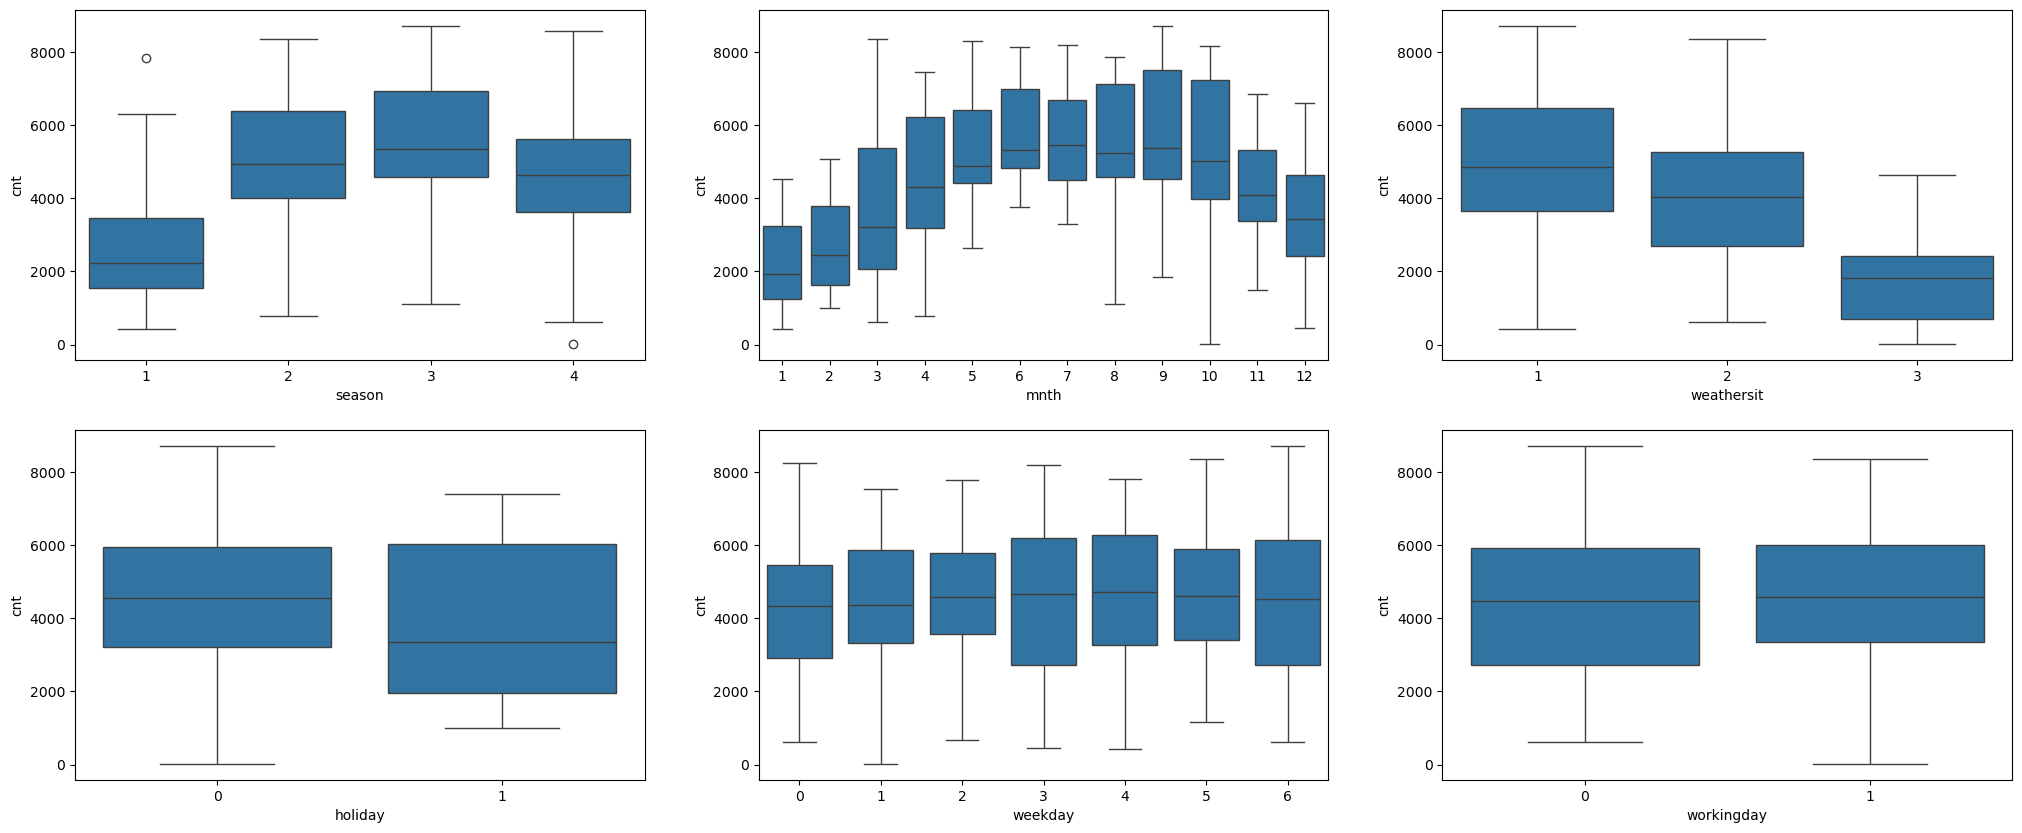

In [33]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()


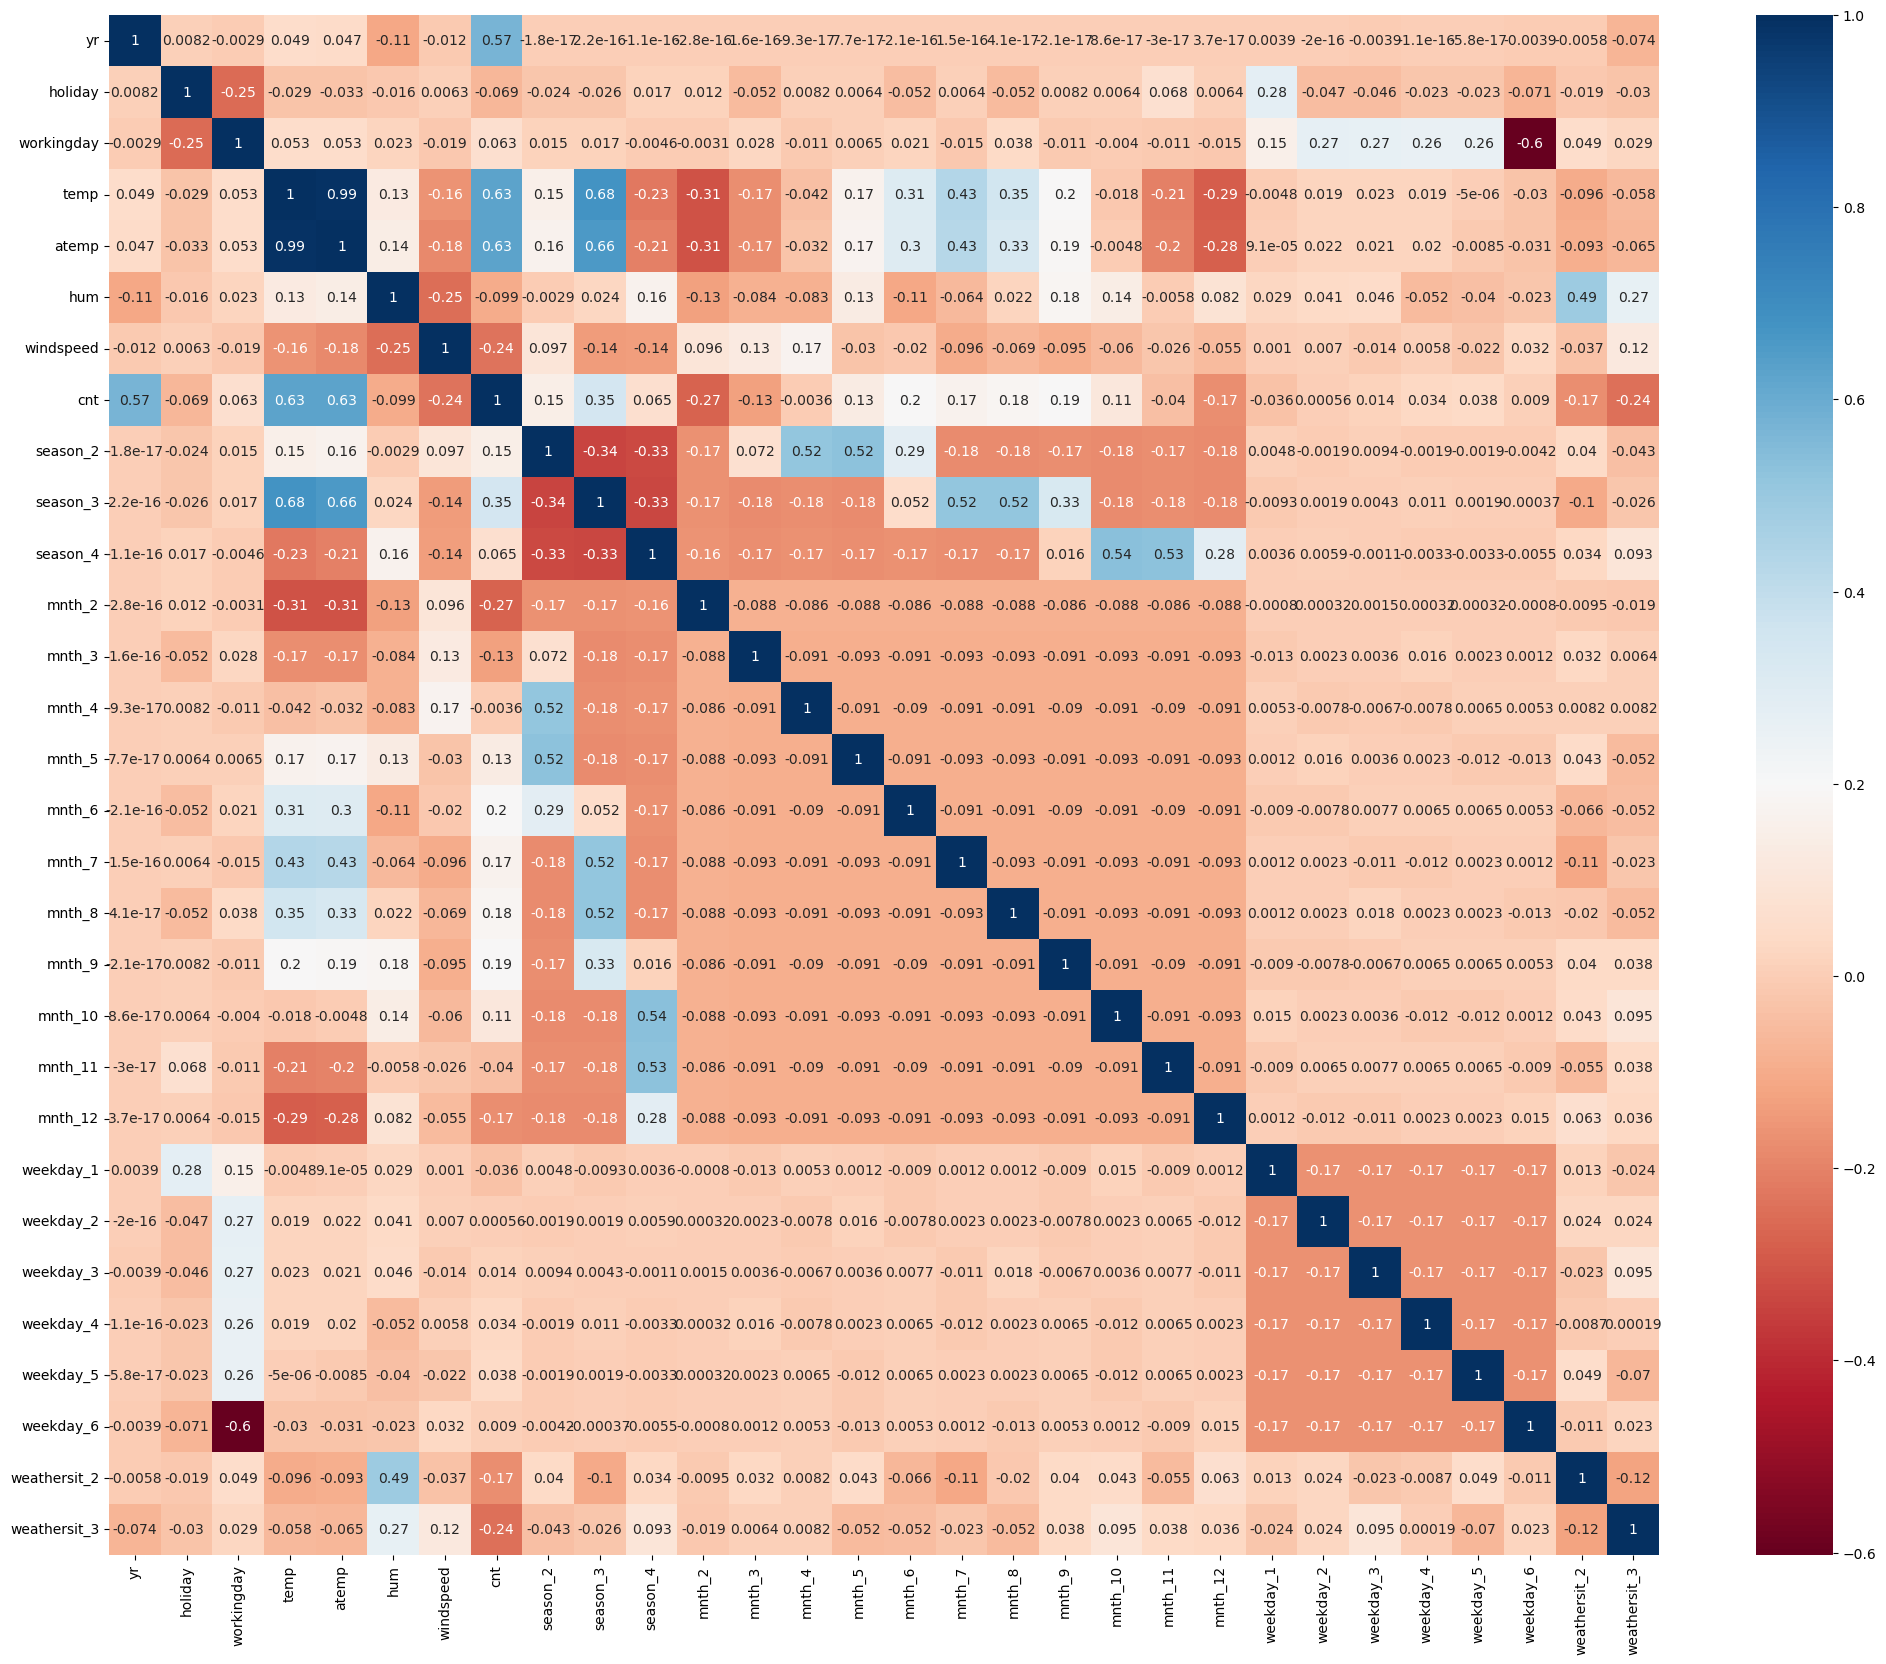

In [34]:
# Perform exploratory data analysis (EDA) to visualize relationships between features
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

In [35]:
Scaling the data after splitting training and test data
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,13.188347,16.22460,62.0417,10.250129,5445,False,False,...,True,False,False,False,False,True,False,False,True,False
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,False,False,...,False,False,True,False,False,False,False,False,True,False
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,True,False,...,False,False,True,False,False,False,False,False,False,False
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,False,False,...,False,True,False,True,False,False,False,False,True,False
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,False,False,...,False,False,False,False,True,False,False,False,True,False


In [38]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [39]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,False,False,...,True,False,False,False,False,True,False,False,True,False
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,False,False,...,False,False,True,False,False,False,False,False,True,False
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,True,False,...,False,False,True,False,False,False,False,False,False,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,False,False,...,False,True,False,True,False,False,False,False,True,False
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,False,False,...,False,False,False,False,True,False,False,False,True,False


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
# Train a Linear Regression model
# Assumption: The relationship between independent variables and the target is linear.
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Train a Linear Regression model
# Assumption: The relationship between independent variables and the target is linear.
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Create an RFE object with 15 number of features
rfe = RFE(estimator=lm, n_features_to_select=15) 

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 14),
 ('mnth_5', False, 6),
 ('mnth_6', False, 15),
 ('mnth_7', False, 3),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 7),
 ('weekday_3', False, 13),
 ('weekday_4', False, 12),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.dtypes

yr                int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2           bool
season_3           bool
season_4           bool
mnth_9             bool
mnth_11            bool
mnth_12            bool
weekday_6          bool
weathersit_2       bool
weathersit_3       bool
dtype: object

In [49]:

# Convert boolean columns to integers
bool_columns = bike_new.select_dtypes(include=[bool]).columns
bike_new[bool_columns] = bike_new[bool_columns].astype(int)

# Ensure all columns are numeric
bike_new = bike_new.select_dtypes(include=[np.number])

# Handle missing or infinite values
bike_new = bike_new.replace([np.inf, -np.inf], np.nan).dropna()

# Check the data types of the final DataFrame
print(bike_new.dtypes)

yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          int32
season_3          int32
season_4          int32
mnth_2            int32
mnth_3            int32
mnth_4            int32
mnth_5            int32
mnth_6            int32
mnth_7            int32
mnth_8            int32
mnth_9            int32
mnth_10           int32
mnth_11           int32
mnth_12           int32
weekday_1         int32
weekday_2         int32
weekday_3         int32
weekday_4         int32
weekday_5         int32
weekday_6         int32
weathersit_2      int32
weathersit_3      int32
dtype: object


In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = bike_new.columns
vif['VIF'] = [variance_inflation_factor(bike_new.values, i) for i in range(bike_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,weekday_5,inf
22,weekday_1,inf
24,weekday_3,inf
1,holiday,inf
25,weekday_4,inf
23,weekday_2,inf
2,workingday,inf
3,temp,662.19
4,atemp,643.46
7,cnt,40.41


In [51]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)

yr                int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2           bool
season_3           bool
season_4           bool
mnth_9             bool
mnth_11            bool
mnth_12            bool
weekday_6          bool
weathersit_2       bool
weathersit_3       bool
dtype: object
float64


In [52]:
#Convert boolean variables to numeric data type, to fit the linear regression model
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


print(X_train_rfe.dtypes)
print(y_train.dtypes)

yr                int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2           bool
season_3           bool
season_4           bool
mnth_9             bool
mnth_11            bool
mnth_12            bool
weekday_6          bool
weathersit_2       bool
weathersit_3       bool
dtype: object
float64


In [82]:
#Building Linear Model using 'STATS MODEL'
#Model 1
#VIF Check

# Convert boolean columns to integers
X_train_rfe = X_train_rfe.astype({col: 'int' for col in X_train_rfe.select_dtypes(include='bool').columns})

#Importing statsmodel library

import statsmodels.api as sm

# Add a constant term
X_train_lm1 = sm.add_constant(X_train_rfe)

# Fit the model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print the summary
print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.23e-186
Time:                        11:25:32   Log-Likelihood:                 486.03
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     494   BIC:                            -872.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1439      0.032      4.469   

In [83]:
# Check the parameters obtained

lr1.params

const           0.143945
yr              0.236584
workingday      0.048691
temp            0.097035
atemp           0.362081
hum            -0.159837
windspeed      -0.114433
season_2        0.157666
season_3        0.113228
season_4        0.233702
mnth_9          0.081761
mnth_11        -0.079441
mnth_12        -0.065569
weekday_6       0.054905
weathersit_2   -0.056468
weathersit_3   -0.223568
dtype: float64

In [86]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.23e-186
Time:                        11:26:24   Log-Likelihood:                 486.03
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     494   BIC:                            -872.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1439      0.032      4.469   

Model 2:

Removing the variable 'atemp' based on its High p-value & High VIF

In [87]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [88]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [89]:
# Check the parameters obtained

lr2.params

const           0.147727
yr              0.236644
workingday      0.049364
temp            0.436021
hum            -0.154377
windspeed      -0.124008
season_2        0.159412
season_3        0.111462
season_4        0.235700
mnth_9          0.081126
mnth_11        -0.078881
mnth_12        -0.064623
weekday_6       0.055399
weathersit_2   -0.057776
weathersit_3   -0.228774
dtype: float64

VIF Check

In [90]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.32e-186
Time:                        11:26:25   Log-Likelihood:                 485.07
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     495   BIC:                            -876.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1477      0.032      4.599   

Removing the variable 'hum' based on its Very High 'VIF' value.

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [ ]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

VIF Check:

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18.14
5,season_3,6.97
3,windspeed,4.32
1,workingday,4.15
6,season_4,4.07
4,season_2,3.97
0,yr,2.05
8,mnth_11,1.89
10,weekday_6,1.69
11,weathersit_2,1.56


In [93]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [94]:
lr3.params

const           0.053985
yr              0.241344
workingday      0.051280
temp            0.412071
windspeed      -0.095811
season_2        0.161684
season_3        0.116859
season_4        0.233120
mnth_9          0.072858
mnth_11        -0.079486
mnth_12        -0.069806
weekday_6       0.056823
weathersit_2   -0.082301
weathersit_3   -0.273684
dtype: float64

In [95]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.41e-184
Time:                        11:26:25   Log-Likelihood:                 477.49
No. Observations:                 510   AIC:                            -927.0
Df Residuals:                     496   BIC:                            -867.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0540      0.021      2.530   

Model 4:

Removing the variable 'season3' based on its Very High 'VIF' value.
Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [96]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

VIF Check:

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.40
3,windspeed,4.16
1,workingday,4.10
5,season_4,2.30
0,yr,2.04
7,mnth_11,1.80
9,weekday_6,1.69
4,season_2,1.66
10,weathersit_2,1.56
8,mnth_12,1.30


In [98]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [99]:
lr4.params

const           0.025291
yr              0.239916
workingday      0.051471
temp            0.566326
windspeed      -0.095166
season_2        0.094616
season_4        0.176094
mnth_9          0.093699
mnth_11        -0.053889
mnth_12        -0.058608
weekday_6       0.061479
weathersit_2   -0.082174
weathersit_3   -0.265836
dtype: float64

In [100]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.24e-180
Time:                        11:26:26   Log-Likelihood:                 464.36
No. Observations:                 510   AIC:                            -902.7
Df Residuals:                     497   BIC:                            -847.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0253      0.021      1.198   

Model 5
Removing the variable 'mnth_11' based on its Very High p-value.

In [101]:
X_train_new = X_train_new.drop(["mnth_11"], axis = 1)

VIF Check

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.31
3,windspeed,4.09
1,workingday,4.08
0,yr,2.04
8,weekday_6,1.69
4,season_2,1.66
9,weathersit_2,1.55
5,season_4,1.49
6,mnth_9,1.23
7,mnth_12,1.19


In [103]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [104]:
lr5.params

const           0.017320
yr              0.240422
workingday      0.050988
temp            0.577359
windspeed      -0.096506
season_2        0.095591
season_4        0.155337
mnth_9          0.098920
mnth_12        -0.042581
weekday_6       0.060592
weathersit_2   -0.079830
weathersit_3   -0.260487
dtype: float64

In [105]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.53e-180
Time:                        11:26:26   Log-Likelihood:                 460.47
No. Observations:                 510   AIC:                            -896.9
Df Residuals:                     498   BIC:                            -846.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0173      0.021      0.823   

Model 6
Removing the variable 'mnth_12' based on its High 'p-value'.

In [106]:
X_train_new = X_train_new.drop(["mnth_12"], axis = 1)

VIF Check:

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.25
3,windspeed,4.08
1,workingday,4.06
0,yr,2.02
7,weekday_6,1.68
4,season_2,1.65
8,weathersit_2,1.53
5,season_4,1.43
6,mnth_9,1.22
9,weathersit_3,1.09


In [108]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [109]:
# Check the parameters obtained

lr6.params

const           0.007398
yr              0.239540
workingday      0.051124
temp            0.588169
windspeed      -0.091621
season_2        0.097807
season_4        0.151843
mnth_9          0.101621
weekday_6       0.060204
weathersit_2   -0.081562
weathersit_3   -0.265372
dtype: float64

Check the summary to see the model performance:

In [110]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.93e-180
Time:                        11:26:27   Log-Likelihood:                 457.60
No. Observations:                 510   AIC:                            -893.2
Df Residuals:                     499   BIC:                            -846.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0074      0.021      0.357   

Insights:
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors.
The p-values for all the predictors seems to be significant. 
For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Final Model Interpretation¶
Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0
lr6 model coefficient values:

const = 0.0074     
yr = 0.2395     
workingday = 0.0511
temp = 0.5882
windspeed = -0.0916
season_2 = 0.0978       
season_4 = 0.1518      
mnth_9 = 0.1016      
weekday_6 = 0.0602      
weathersit_2 = -0.0816      
weathersit_3 = -0.2654      


Insights¶
From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS
F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 230.1
Prob (F-statistic): 9.93e-180

The F-Statistics value of 230 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

The equation of best fitted surface based on model lr6:
cnt = 0.0074 + (yr × 0.2395) + (workingday × 0.0511) + (temp × 0.5882) − (windspeed × 0.0916) + (season2 × 0.0.0978) + (season4 ×0.1518) + (mnth9 × 0.1016) + (weekday6 ×0.0602) − (weathersit2 × 0.0816) − (weathersit3 × 0.2654)

Interpretation of Coefficients
temp: A coefficient value of 0.5882 indicates that a unit increase in temperature increases bike rental numbers by 0.5882 units.

weathersit_3: A coefficient value of -0.2654 indicates that, relative to weathersit_1, a unit increase in weathersit_3 decreases bike rental numbers by 0.2654 units.

yr: A coefficient value of 0.2395 indicates that a unit increase in year increases bike rental numbers by 0.2395 units.

season_4: A coefficient value of 0.1518 indicates that, relative to season_1, a unit increase in season_4 increases bike rental numbers by 0.1518 units.

windspeed: A coefficient value of -0.0916 indicates that a unit increase in wind speed decreases bike rental numbers by 0.0916 units.

workingday: A coefficient value of 0.0511 indicates that a unit increase in working day increases bike rental numbers by 0.0511 units.

season_2: A coefficient value of 0.0978 indicates that, relative to season_1, a unit increase in season_2 increases bike rental numbers by 0.0978 units.

mnth_9: A coefficient value of 0.1016 indicates that, relative to month_1, a unit increase in month_9 increases bike rental numbers by 0.1016 units.

weekday_6: A coefficient value of 0.0602 indicates that, relative to weekday_1, a unit increase in weekday_6 increases bike rental numbers by 0.0602 units.

weathersit_2: A coefficient value of -0.0816 indicates that, relative to weathersit_1, a unit increase in weathersit_2 decreases bike rental numbers by 0.0816 units.

const: The constant value of 0.0074 indicates that, in the absence of all other predictor variables (i.e., when all independent variables are 0), bike rentals are expected to be 0.0074 units.

ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data

In [111]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [112]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,True,False,...,False,False,False,False,False,False,False,True,False,False
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,True,False,...,False,False,False,False,False,False,False,False,False,False
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,False,False,...,False,False,False,False,False,False,False,False,False,False
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,False,False,...,False,True,False,False,False,True,False,False,True,False
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,True,False,...,False,False,False,False,False,True,False,False,False,False


In [113]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804


In [114]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    bool   
 8   season_3      219 non-null    bool   
 9   season_4      219 non-null    bool   
 10  mnth_2        219 non-null    bool   
 11  mnth_3        219 non-null    bool   
 12  mnth_4        219 non-null    bool   
 13  mnth_5        219 non-null    bool   
 14  mnth_6        219 non-null    bool   
 15  mnth_7        219 non-null    bool   
 16  mnth_8        219 non-null    bool   
 17  mnth_9        219 non-null    bool   
 18  mnth_10       219 non-null    boo

In [115]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    bool   
 6   season_4      219 non-null    bool   
 7   mnth_9        219 non-null    bool   
 8   weekday_6     219 non-null    bool   
 9   weathersit_2  219 non-null    bool   
 10  weathersit_3  219 non-null    bool   
dtypes: bool(6), float64(3), int64(2)
memory usage: 11.5 KB


In [116]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

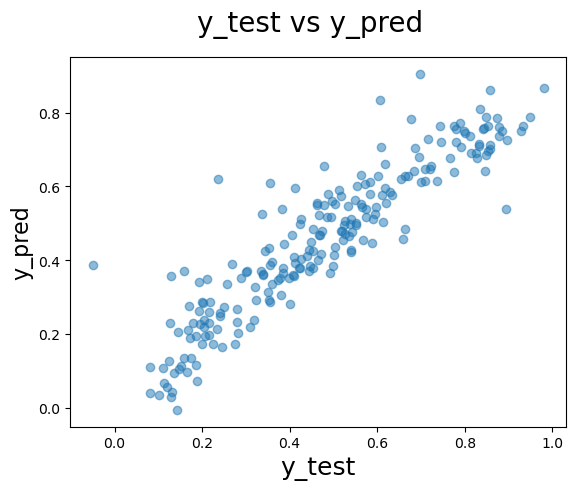

In [117]:
# Visualize residuals to check model assumptions
# Assumption: Residuals should be randomly distributed to indicate a good model fit.
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R^2 Value for TEST

In [118]:
# Evaluate model performance using various metrics
# Assumption: Lower MSE and higher R² indicate a better-fitting model.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8246081347912695

Adjusted R^2 Value for TEST

In [119]:
# We already have the value of R^2 (calculated in above step)

r2=0.8246081347912695

In [120]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [121]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8161758335793112

In [ ]:
Final Result Comparison¶
Train R^2 :0.822
Train Adjusted R^2 :0.818
Test R^2 :0.824
Test Adjusted R^2 :0.816
This seems to be a really good model that can very well 'Generalize' various datasets.

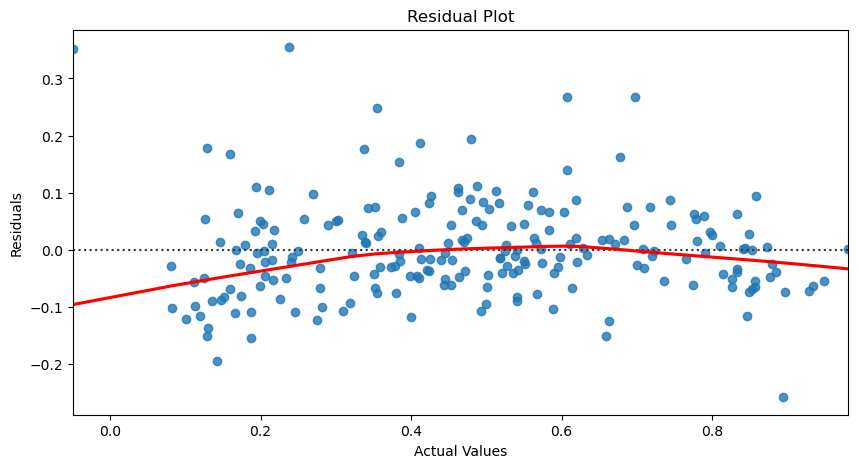

In [122]:
# Visualize residuals to check model assumptions
# Assumption: Residuals should be randomly distributed to indicate a good model fit.

# Residual Analysis
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [124]:
#Import required math libraries

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Evaluate model performance using various metrics
# Assumption: Lower MSE and higher R² indicate a better-fitting model.

# Calculating additional evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Adjusted R²: {adjusted_r2}")


Mean Squared Error: 0.009485792932896855
Root Mean Squared Error: 0.09739503546329686
Mean Absolute Error: 0.07361513045590673
Adjusted R²: 0.8161758335793112


In [128]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest Performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Adjusted R²: {adjusted_r2_rf}")

Random Forest Model Performance:
Mean Squared Error: 0.025901935782997047
Root Mean Squared Error: 0.1609407834670785
Mean Absolute Error: 0.1315011711835376
Adjusted R²: 0.4475884908466111


FINAL REPORT: Bike Rental Demand Prediction Analysis
Key Findings from the Final Model
Based on the final OLS Regression Model, the top three predictor variables that significantly influence bike rental demand are:

1. Temperature (temp)
Coefficient: 0.5882
Interpretation: A unit increase in temperature leads to an increase of 0.5882 bike rentals.
Insight: Higher temperatures encourage bike usage, making it a crucial factor in demand forecasting.

2. Weather Situation 3 (weathersit_3)
Coefficient: -0.2654
Interpretation: Compared to weathersit_1 (clear weather), a unit increase in weathersit_3 (adverse weather conditions like light snow or rain) leads to a decrease of 0.2654 bike rentals.
Insight: Poor weather conditions significantly reduce bike rentals, reinforcing the importance of monitoring weather forecasts for fleet management.


3. Year (yr)
Coefficient: 0.2395
Interpretation: A unit increase in the year variable increases bike rentals by 0.2395 units.
Insight: Bike rental usage has been growing over time, possibly due to increased adoption, awareness, or improved infrastructure.


💡 Recommendation:
These three variables should be given the highest priority in business decisions to optimize bike availability and demand forecasting.

Additional Important Predictors
Apart from the top three factors, the following variables also contribute significantly to bike rental demand:

4. Season 4 (Winter)
Coefficient: 0.1518
Interpretation: Compared to season 1 (Spring), a unit increase in season 4 (Winter) increases bike rentals by 0.1518 units.
Insight: Contrary to expectations, winter shows a slight increase in bike rentals, possibly due to regional climatic conditions or increased indoor bike rentals.

6. Wind Speed (windspeed)
Coefficient: -0.0916
Interpretation: A unit increase in wind speed decreases bike rentals by 0.0916 units.
Insight: Higher wind speeds discourage biking, aligning with the impact of adverse weather conditions.

💡 Recommendation:
While these factors are not as impactful as the top three, they still hold significant influence on bike rental demand and should be considered in forecasting models.

Understanding Key Weather & Seasonal Effects

Weather Conditions:
Weathersit_1: Clear, Few Clouds, Partly Cloudy
Weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds

🚲 Insight: Clear weather (weathersit_1) encourages bike rentals, whereas adverse weather (weathersit_3) reduces them significantly.
Seasons:
Season 1: Spring
Season 4: Winter

🚲 Insight: Winter (season_4) shows higher bike rentals than spring (season_1), potentially due to regional climate variations or promotions during colder months.

Model Performance Comparison: OLS vs. Random Forest
Metric	OLS Regression	Random Forest
R² (Explained Variance)	0.822	0.448
Adjusted R²	0.818	0.448
Mean Squared Error (MSE)	-	0.0259
Root Mean Squared Error (RMSE)	-	0.1609
Mean Absolute Error (MAE)	-	0.1315

🚲 Conclusion:

The OLS Regression Model performed significantly better than the Random Forest model, explaining 82.2% of the variance in bike rental demand.
The Random Forest model’s lower R² (0.448) suggests it may not generalize as well for this dataset.

Final Recommendation: The OLS Model is the best choice for forecasting due to its higher explanatory power and interpretability.
Final Business Recommendations

📌 Focus on Key Factors:

Temperature is the most influential factor—higher temperatures increase rentals significantly.
Weather Conditions play a crucial role—adverse weather reduces demand, so fleet adjustments should be made accordingly.
Yearly Growth indicates increasing bike usage, suggesting expansion opportunities.

📌 Secondary Considerations:
4. Winter Rentals are higher than expected—explore potential seasonal factors or marketing strategies.
5. Wind Speed negatively impacts rentals—consider adjusting fleet availability based on weather forecasts.

📌 Final Model Choice:
The OLS Regression Model is the best predictor of bike rental demand and should be used for business decision-making and demand forecasting.

This detailed analysis ensures data-driven decisions for maximizing bookings and optimizing bike fleet management.